In [7]:
import numpy as np 
import pandas as pd 
import glob 
import time
import re
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

## Data loading
### ทำการ load data จาก excel sheet

In [8]:
crm_survey = pd.read_excel('Customer_Behaviors_Responses.xlsx',sheet_name = 'Form Responses 1')

## Data Cleansing and Data Encoding 

### ทำการ encoding data จาก categoty to numerical range และ ทำการเปลี่ยนวันเดือนปีเกิด ให้อยุ่ใน format คศ และทำการหาอายุ

In [9]:
list_grade_inter = {'สนใจอย่างมากที่สุด':7,'สนใจอย่างมาก':6,'สนใจ':5, 'เฉยๆ':4,'ไม่สนใจ':3,'ไม่สนใจอย่างมาก':2,'ไม่สนใจอย่างมากที่สุด':1}
consume  = {'แทบทุกวัน':6,'อาทิตย์ละครั้ง':5,'เดือนละ 2-3 ครั้ง':4, 'หลายเดือนครั้ง':2, 'แทบไม่ได้บริโภคเลย':1,
       'เดือนละครั้ง':3}


In [10]:
## clean data 
day_brith = ['Year','Month','Day']
#'คุณเกิดวันที่เท่าไหร่'
crm_survey['คุณเกิดวันที่เท่าไหร่_s'] = crm_survey['คุณเกิดวันที่เท่าไหร่'].astype(str) 
crm_survey[day_brith] = crm_survey['คุณเกิดวันที่เท่าไหร่_s'].str.split( '-',expand = True )
crm_survey['Year'] = crm_survey['Year'].apply(lambda x : int(x)-543 if int(x) > 2400  else x)
crm_survey['Day'] = crm_survey['Day'].apply(lambda  x : x.split()[0] )
crm_survey['Age'] = crm_survey['Year'].apply(lambda x : 2021- int(x)  )
##### Mapping value ##
def get_value(x) :
    if x in consume:
        y = consume.get(x)
    else :
        y = -1
    return y


def map_value(x) :
    if x == 'สนใจอย่างมากที่สุด'  :
        y=7
    elif x == 'สนใจอย่างมาก' :
        y = 6 
    elif x == 'สนใจ'    :
        y = 5
    elif x == 'เฉยๆ'     :
        y = 4
    elif x == 'ไม่สนใจ'   :
        y = 3 
    elif x == 'ไม่สนใจอย่างมาก'  :
        y = 2
    elif x == 'ไม่สนใจอย่างมากที่สุด' :
        y = 1
    else :
        y= -1
    return y 
#####
interested = [ 'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารญี่ปุ่น]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารจึน]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารไทย]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารอีสาน]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารสุขภาพ]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [บุฟเฟต์]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ชาบูชาบู]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ปิ้งย่าง]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เหล้าเบียร์]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เสื้อผ้าแฟชั่น]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [แต่งหน้า]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [skincare บำรุงผิว]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การออกกำลังกาย]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเล่นเกมส์]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การท่องเที่ยว]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านหนังสือ]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านบทความ Online]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเรียน e-learning]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Series]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดูหนัง]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Youtube]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Netflix]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content ด้านบันเทิง]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่่ยวกับเกมส์]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการ review ร้านอาหาร]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการท่องเที่ยว]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการแต่งบ้าน]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการโทรทัศน์]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับละคร]',
       'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการเมือง]']


needed = ['คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารญี่ปุ่น]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารจึน]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารไทย]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารอีสาน]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารสุขภาพ]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [บุฟเฟต์]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ชาบูชาบู]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ปิ้งย่าง]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เหล้าเบียร์]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เสื้อผ้าแฟชั่น]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [แต่งหน้า]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [skincare บำรุงผิว]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การออกกำลังกาย]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเล่นเกมส์]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การท่องเที่ยว]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านหนังสือ]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านบทความ Online]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเรียน e-learning]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Series]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดูหนัง]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Youtube]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Netflix]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content ด้านบันเทิง]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่่ยวกับเกมส์]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการ review ร้านอาหาร]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการท่องเที่ยว]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการแต่งบ้าน]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการโทรทัศน์]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับละคร]',
       'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการเมือง]']

#list_grade_inter = {'สนใจอย่างมากที่สุด':6,'สนใจอย่างมาก':5,'สนใจ':4, 'เฉยๆ':3,'ไม่สนใจ':2,'ไม่สนใจอย่างมาก':1,'ไม่สนใจอย่างมากที่สุด':0}


def makk(x) :
    return x+''
#crm_survey[ 'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารจึน]'] = crm_survey[ 'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารจึน]'].apply(get_value)   #.apply(lambda x: list_grade_inter.get(x) if x in list_grade_inter  else 0)
#crm_survey[ 'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับละคร]'] = crm_survey[ 'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับละคร]'].apply(get_value) 
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารญี่ปุ่น]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารญี่ปุ่น]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารจึน]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารจึน]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารไทย]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารไทย]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารอีสาน]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารอีสาน]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารสุขภาพ]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารสุขภาพ]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [บุฟเฟต์]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [บุฟเฟต์]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ชาบูชาบู]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ชาบูชาบู]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ปิ้งย่าง]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ปิ้งย่าง]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เหล้าเบียร์]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เหล้าเบียร์]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เสื้อผ้าแฟชั่น]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เสื้อผ้าแฟชั่น]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [แต่งหน้า]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [แต่งหน้า]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [skincare บำรุงผิว]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [skincare บำรุงผิว]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การออกกำลังกาย]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การออกกำลังกาย]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเล่นเกมส์]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเล่นเกมส์]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การท่องเที่ยว]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การท่องเที่ยว]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านหนังสือ]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านหนังสือ]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านบทความ Online]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านบทความ Online]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเรียน e-learning]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเรียน e-learning]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Series]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Series]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดูหนัง]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดูหนัง]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Youtube]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Youtube]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Netflix]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Netflix]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content ด้านบันเทิง]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content ด้านบันเทิง]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่่ยวกับเกมส์]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่่ยวกับเกมส์]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการ review ร้านอาหาร]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการ review ร้านอาหาร]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการท่องเที่ยว]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการท่องเที่ยว]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการแต่งบ้าน]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการแต่งบ้าน]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการโทรทัศน์]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการโทรทัศน์]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับละคร]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับละคร]"].apply(map_value)
crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการเมือง]"] =crm_survey["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการเมือง]"].apply(map_value)
     # if x == 'สนใจอย่างมากที่สุด'                         
#df[["Integers", "Float"]] = df[["Integers", "Float"]].apply(multiply_by_2)    
### need
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารญี่ปุ่น]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารญี่ปุ่น]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารจึน]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารจึน]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารไทย]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารไทย]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารอีสาน]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารอีสาน]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารสุขภาพ]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารสุขภาพ]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [บุฟเฟต์]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [บุฟเฟต์]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ชาบูชาบู]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ชาบูชาบู]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ปิ้งย่าง]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ปิ้งย่าง]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เหล้าเบียร์]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เหล้าเบียร์]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เสื้อผ้าแฟชั่น]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เสื้อผ้าแฟชั่น]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [แต่งหน้า]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [แต่งหน้า]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [skincare บำรุงผิว]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [skincare บำรุงผิว]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การออกกำลังกาย]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การออกกำลังกาย]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเล่นเกมส์]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเล่นเกมส์]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การท่องเที่ยว]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การท่องเที่ยว]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านหนังสือ]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านหนังสือ]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านบทความ Online]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านบทความ Online]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเรียน e-learning]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเรียน e-learning]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Series]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Series]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดูหนัง]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดูหนัง]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Youtube]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Youtube]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Netflix]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Netflix]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content ด้านบันเทิง]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content ด้านบันเทิง]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่่ยวกับเกมส์]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่่ยวกับเกมส์]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการ review ร้านอาหาร]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการ review ร้านอาหาร]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการท่องเที่ยว]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการท่องเที่ยว]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการแต่งบ้าน]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการแต่งบ้าน]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการโทรทัศน์]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการโทรทัศน์]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับละคร]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับละคร]"].apply(get_value)
crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการเมือง]"] =crm_survey["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการเมือง]"].apply(get_value)
####



## Impute Missing Value with  Age
### Found some data put wrong brith date use mean age to impute missing value 

In [11]:
temp_survey = crm_survey.copy()
temp_survey2= crm_survey.copy()
### replace missig value 
temp_survey['Age'] = temp_survey[['Age']].replace(0, np.nan )
temp_survey['Age1'] = temp_survey['Age'].fillna(temp_survey['Age'].mean(), inplace=True)

temp_survey= temp_survey.drop('Age1', axis=1)
temp_survey

,Timestamp,คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารญี่ปุ่น],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารจึน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารไทย],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารอีสาน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารสุขภาพ],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [บุฟเฟต์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ชาบูชาบู],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ปิ้งย่าง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เหล้าเบียร์],...,คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับละคร],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการเมือง],นอกเหนือจากรายการดังกล่าวแล้ว คุณมีความสนใจในเรื่องใดอีกบ้าง,คุณเกิดวันที่เท่าไหร่,เพศ,คุณเกิดวันที่เท่าไหร่_s,Year,Month,Day,Age
0,2021-01-09 10:07:27.365,5,5,7,6,5,5,5,5,7,...,4,6,"กีฬา UFC, Soccer",1988-09-19 00:00:00,ชาย,1988-09-19 00:00:00,1988,09,19,33.0
1,2021-01-09 10:07:34.010,6,4,7,6,5,6,7,6,3,...,2,5,กีฬา สัตว์เลี้ยง เทคโนโลยี,2536-08-10 00:00:00,หญิง,2536-08-10 00:00:00,1993,08,10,28.0
2,2021-01-09 10:07:35.902,7,4,6,5,4,7,7,7,2,...,2,6,-,1993-11-07 00:00:00,ชาย,1993-11-07 00:00:00,1993,11,07,28.0
3,2021-01-09 10:07:36.476,5,4,4,4,5,5,5,5,1,...,1,4,"โหราศาสตร์,ดูดวง",1994-04-14 00:00:00,ชาย,1994-04-14 00:00:00,1994,04,14,27.0
4,2021-01-09 10:07:41.965,6,5,5,5,7,4,4,4,4,...,1,4,สัตว์เลี้ยง,1995-04-19 00:00:00,หญิง,1995-04-19 00:00:00,1995,04,19,26.0
5,2021-01-09 10:07:42.062,7,7,7,5,4,7,7,7,7,...,3,6,ด้านการออมเงินวางแผนการใช้เงิน,1993-04-25 00:00:00,ชาย,1993-04-25 00:00:00,1993,04,25,28.0
6,2021-01-09 10:07:53.496,7,5,7,7,5,4,5,5,4,...,6,6,อุปกรณ์ไอที,1992-05-17 00:00:00,หญิง,1992-05-17 00:00:00,1992,05,17,29.0
7,2021-01-09 10:08:04.631,6,3,7,7,5,6,7,5,7,...,1,6,"ฟุตบอล, ถ่ายภาพ, รถยนต์, ผู้หญิง",1993-04-02 00:00:00,ชาย,1993-04-02 00:00:00,1993,04,02,28.0
8,2021-01-09 10:08:08.060,7,3,6,6,4,6,6,6,3,...,3,5,"Technology, Gadget, Shopping, Business",1993-12-29 00:00:00,ชาย,1993-12-29 00:00:00,1993,12,29,28.0
9,2021-01-09 10:08:09.535,5,4,6,4,5,5,5,5,6,...,4,6,นอน,1985-11-11 00:00:00,ชาย,1985-11-11 00:00:00,1985,11,11,36.0


## Rename of columns 

In [12]:
cm1 = temp_survey.iloc[:,:].columns.rename('col_name')
cm1_interest = temp_survey.loc[:,'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารญี่ปุ่น]':'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการเมือง]'].columns.rename('col_name')
cm1_consume = temp_survey.loc[:, 'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารญี่ปุ่น]':'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการเมือง]'].columns.rename('col_name')
#cm1 = temp_survey.iloc[:,1:-8].columns.rename('col_name')

doc_col  = pd.DataFrame(cm1)
#u= 'sd'
def split_name_inter(x) :
        try :
            if 'สนใจ' in x : 
                word = x.split('[')[1]
                y = f'สนใจ[{word}'
                return y
            elif 'บริโภค' in x :
                word = x.split('[')[1]
                y = f'บริโภค[{word}'
                return y
            else :
                return x
        except :
                return x

#cm1[['']]
doc_col['col_name'] = doc_col['col_name'].apply( split_name_inter )
columns_new  = doc_col['col_name'].to_list()
columns_old = temp_survey.columns.to_list()
columns_t = dict(zip(columns_old,columns_new))
temp_survey = temp_survey.rename(columns=columns_t )#temp_survey


## Display final data 

In [13]:
temp_survey.columns

Index(['Timestamp', 'สนใจ[อาหารญี่ปุ่น]', 'สนใจ[อาหารจึน]', 'สนใจ[อาหารไทย]',
       'สนใจ[อาหารอีสาน]', 'สนใจ[อาหารสุขภาพ]', 'สนใจ[บุฟเฟต์]',
       'สนใจ[ชาบูชาบู]', 'สนใจ[ปิ้งย่าง]', 'สนใจ[เหล้าเบียร์]',
       'สนใจ[เสื้อผ้าแฟชั่น]', 'สนใจ[แต่งหน้า]', 'สนใจ[skincare บำรุงผิว]',
       'สนใจ[การออกกำลังกาย]', 'สนใจ[การเล่นเกมส์]', 'สนใจ[การท่องเที่ยว]',
       'สนใจ[การอ่านหนังสือ]', 'สนใจ[การอ่านบทความ Online]',
       'สนใจ[การเรียน e-learning]', 'สนใจ[ดู Series]', 'สนใจ[ดูหนัง]',
       'สนใจ[ดู Youtube]', 'สนใจ[ดู Netflix]', 'สนใจ[Content ด้านบันเทิง]',
       'สนใจ[Content เกี่่ยวกับเกมส์]',
       'สนใจ[Content เกี่ยวกับการ review ร้านอาหาร]',
       'สนใจ[Content เกี่ยวกับการท่องเที่ยว]',
       'สนใจ[Content เกี่ยวกับการแต่งบ้าน]',
       'สนใจ[Content เกี่ยวกับการโทรทัศน์]', 'สนใจ[Content เกี่ยวกับละคร]',
       'สนใจ[Content เกี่ยวกับการเมือง]', 'บริโภค[อาหารญี่ปุ่น]',
       'บริโภค[อาหารจึน]', 'บริโภค[อาหารไทย]', 'บริโภค[อาหารอีสาน]',
       'บริโภค[อาหารสุขภาพ]', 'บริโภ

## Graph Plot 

In [72]:
# rr = temp_survey.columns.to_list()
# import matplotlib.pyplot  as plt
# import matplotlib.font_manager as fm
# jp = [ i for i in rr if (('คุณมีความสนใจ') in i) ]
# nrow = 3
# ncol = 10

# #plt.figure(figsize=(200,100))
# fig, axes = plt.subplots(nrow, ncol)

# #plt.figure(figsize=(30,4))
# c = 0 
# #font_path = "/System/Library/Fonts/STHeiti Light.ttc"
# plt.rcParams["font.family"] = 'Tahoma'  
# #prop = mfm.FontProperties(fname=font_path)
# count = 0 
# for i in range(nrow) :
#      for j in range(ncol) :
#         #c = 0     
#         #plt.rcParams['front.family'] = 'Tahoma' 
#         temp_survey.groupby([jp[count],'เพศ']).size().unstack().plot(kind='bar',stacked=False,  ax=axes[i,j], legend  = False )
#         plt.rcParams["font.family"] = 'Tahoma'  
#         #ax.set_xticklabels(rr.get_xticklabels(), fontproperties=prop)
#         count +=1
#        # print(count)
# #plt.rcParams['front.family'] = 'Tahoma'  
# plt.figure(figsize=(3,1000))
# plt.show()  
        #temp_survey[temp_survey[{jp[i]},{jp[2]}]#.size().unstack().plot(kind='bar',stacked=False)

#temp_survey.groupby(['เพศ','Age']).size()#.plot(kind='line',xticks = 'Age')#.unstack()#.plot(kind='line',xticks = 'Age')   
        

## SAMPLE PLOT BETWEEN สนใจการเมือง และ การบริโภคข่าวการเมือง 

#### หาความสัมพันธ์ของความสนในการเมืองและการริโภคข่าวการเมือง พบว่าผู้ชายส่วนมากมีความสนใจการเมืองและบริโภคมากกว่าผู้หญิง 

<AxesSubplot:xlabel='สนใจ[Content เกี่ยวกับการเมือง]', ylabel='บริโภค[Content เกี่ยวกับการเมือง]'>

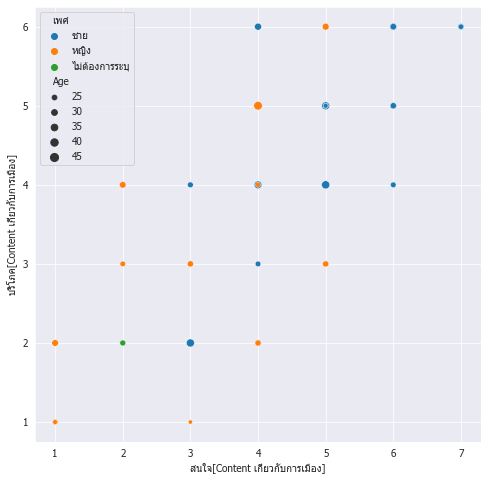

In [16]:
#temp = temp_survey.loc[['บริโภค[Content เกี่ยวกับการเมือง]','สนใจ[Content เกี่ยวกับการเมือง]']]
import matplotlib.font_manager as fm
sb.set_style("darkgrid",{"font.sans-serif":['simhei', 'Tahoma']})
tempee = temp_survey.loc[:, ['บริโภค[Content เกี่ยวกับการเมือง]','สนใจ[Content เกี่ยวกับการเมือง]','เพศ','Age']]
#plt.rcParams['front.family'] = 'Tahoma'
f, ax = plt.subplots(figsize =(8, 8)) 
#sb.rcParams['front.family'] = 'Tahoma' 
sb.scatterplot(y='บริโภค[Content เกี่ยวกับการเมือง]',x='สนใจ[Content เกี่ยวกับการเมือง]', hue='เพศ',size = 'Age',data=tempee)
#sb.scatterplot(x='บริโภค[Content เกี่ยวกับการเมือง]',y='สนใจ[Content เกี่ยวกับการเมือง]', hue='เพศ',data=tempee)


## SAMPLE PLOT BETWEEN สนใจ[แต่งหน้า]และบริโภค[แต่งหน้า]
จะเห็นได้ว่าเพศหญิงจะมีความสนใจแต่งหน้าและใช้การเเต่งหน้าที่คะเเนนความสัมพันธ์กันที่สูงโดยเฉพาะช่วงที่มีอายุน้อยๆ เมื่อเทียบกับผู้ชาย

C:\Users\rangsarid.p\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


<AxesSubplot:xlabel='สนใจ[แต่งหน้า]', ylabel='บริโภค[แต่งหน้า]'>

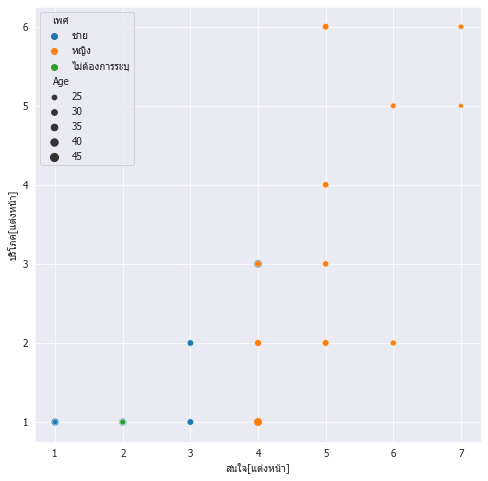

In [17]:

sb.set_style("darkgrid",{"font.sans-serif":['simhei', 'Tahoma']})
tempee = temp_survey.loc[:, ['บริโภค[แต่งหน้า]','สนใจ[แต่งหน้า]','','เพศ','Age']]
#plt.rcParams['front.family'] = 'Tahoma'
f, ax = plt.subplots(figsize =(8, 8)) 
#sb.rcParams['front.family'] = 'Tahoma' 
sb.scatterplot(y='บริโภค[แต่งหน้า]',x='สนใจ[แต่งหน้า]', hue='เพศ',size = 'Age',data=tempee)


## Age Distributed
ดูการกระจายตัวของอายุของการทำสำรวจ พบว่าจะอยู่ที่ช่วงอายุ 30 ปี 

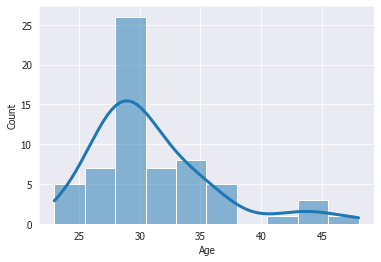

In [20]:
age = temp_survey.Age
sb.histplot(data=age,kde=True,line_kws={"linewidth":3})
plt.savefig('./Hw1/age_distributed.png',dpi = 150 , format = 'png' )


## Find  Age Distributed Male & Female

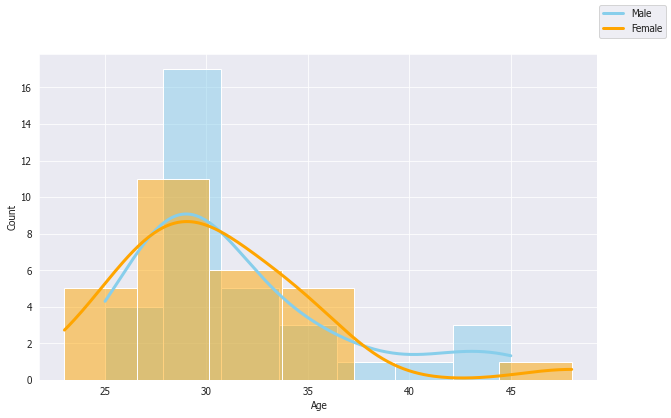

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))

temp_man = temp_survey[temp_survey['เพศ'] == 'ชาย']
temp_woman = temp_survey[temp_survey['เพศ'] == 'หญิง']
dd =sb.histplot( temp_man["Age"] , color="skyblue",kde=True,line_kws={"linewidth":3}, label = 'Male')
ee = sb.histplot( temp_woman['Age'] , color="orange",kde=True,line_kws={"linewidth":3},label = 'Female')
fig.legend(labels=['Male','Female'])
plt.savefig('./Hw1/age_distributed_sex.png',dpi = 150 , format = 'png' )
#plt.legend(handles = [dd,ee])
#sb.show()plt.legend(handles=[blue_line])


## Find mean 

In [22]:

display(temp_survey.groupby('เพศ').mean())


,สนใจ[อาหารญี่ปุ่น],สนใจ[อาหารจึน],สนใจ[อาหารไทย],สนใจ[อาหารอีสาน],สนใจ[อาหารสุขภาพ],สนใจ[บุฟเฟต์],สนใจ[ชาบูชาบู],สนใจ[ปิ้งย่าง],สนใจ[เหล้าเบียร์],สนใจ[เสื้อผ้าแฟชั่น],...,บริโภค[ดู Netflix],บริโภค[Content ด้านบันเทิง],บริโภค[Content เกี่่ยวกับเกมส์],บริโภค[Content เกี่ยวกับการ review ร้านอาหาร],บริโภค[Content เกี่ยวกับการท่องเที่ยว],บริโภค[Content เกี่ยวกับการแต่งบ้าน],บริโภค[Content เกี่ยวกับการโทรทัศน์],บริโภค[Content เกี่ยวกับละคร],บริโภค[Content เกี่ยวกับการเมือง],Age
เพศ,,,,,,,,,,,,,,,,,,,,,
ชาย,6.147059,4.647059,5.647059,5.117647,4.941176,5.470588,5.764706,5.794118,4.588235,4.176471,...,4.382353,3.470588,3.735294,3.735294,3.529412,2.852941,2.088235,1.882353,4.764706,31.500000
หญิง,6.035714,4.821429,5.678571,5.250000,5.000000,5.392857,5.642857,5.428571,3.571429,5.214286,...,4.285714,4.535714,2.714286,4.428571,4.392857,3.535714,2.785714,3.107143,3.571429,30.428571
ไม่ต้องการระบุ,5.000000,4.000000,4.000000,4.000000,6.000000,4.000000,4.000000,4.000000,3.000000,3.000000,...,5.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,30.000000


## FInd Fequency of word 
### ใช้ pythai nlp ในการตัดsentence และ ตัด word จาก free type columns 'นอกเหนือจากรายการดังกล่าวแล้ว คุณมีความสนใจในเรื่องใดอีกบ้าง'

In [23]:
#temp_survey.to_excel('lll.xlsx')
import matplotlib.pyplot as plt
from pythainlp.tokenize import sent_tokenize
from pythainlp.tokenize import word_tokenize
# from pythainlp.tokenize import sent_tokenize
location = 'C:\\Users\\rangsarid.p\\Desktop\\python_code\\crm\\'
#temp_survey3 = pd.read_excel(f'{location}lll.xlsx')
temp_survey3 = temp_survey.copy()
lis_word = temp_survey3['นอกเหนือจากรายการดังกล่าวแล้ว คุณมีความสนใจในเรื่องใดอีกบ้าง'].to_list()
oo = ' '.join(lis_word)
ss= sent_tokenize(oo, engine="whitespace")

stop_word = ['  ',' ',',','-','/','(',')','\n','และ','เกี่ยวกับ','ด้าน']
oo2 = [ i for i in  oo  if i not in stop_word ]
ss
hh = []
dict_word = {}
for g in ss :
    dd= word_tokenize(g, engine="newmm")
    count=0
    for ddd in dd:
        if ddd not in stop_word :
            if ddd.lower() not in dict_word:
                dict_word[ddd.lower()] = 1
            else :    
                 dict_word[ddd.lower()] += 1 
sorted_values = dict(sorted(dict_word.items(),key= lambda item : item[1], reverse=True))#[9::-1] ) 
wordw = list(sorted_values.keys())
count = list(sorted_values.values())
dcit_w = {'word': wordw , 'count':count}
w_c = pd.DataFrame(dcit_w)
w_c
#dict(sorted(x.items(), key=lambda item: item[1]))
#print(sorted_values)
#tt_word = pd.DataFrame(sorted_values, columns = ['name','count'])
#tt_word #= tt_word.T
#sorted_values.plt('bar')
#for i , j in sorted_values.items():
  #  plt.barh(i,j)

#plt.tight_layout(pad=0.7)
#plt.show() 


,word,count
0,สัตว์เลี้ยง,10
1,กีฬา,5
2,รถยนต์,5
3,เทคโนโลยี,4
4,ฟุตบอล,4
5,การลงทุน,4
6,content,4
7,เงิน,3
8,technology,3
9,gadget,3


## Find top 10 the frequency of word 
#### พบว่าคนส่วนใหญ่สนใจในเรื่อง สัตว์เลี้ยงมาเป็นอันดับเเรกที่ 10 คน เเละ กีฬาและรถยนต์มาเป็นอันดับ 2 ตามลำดับ

In [24]:
w_c_10 = w_c.head(10)
display(w_c_10)

,word,count
0,สัตว์เลี้ยง,10
1,กีฬา,5
2,รถยนต์,5
3,เทคโนโลยี,4
4,ฟุตบอล,4
5,การลงทุน,4
6,content,4
7,เงิน,3
8,technology,3
9,gadget,3


## Plot bar Graph 10 Tops list

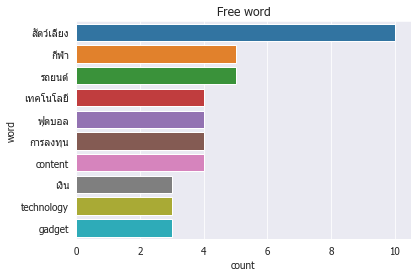

In [33]:
#sb.set_theme(style="whitegrid")
plt.plot(figure = (20,15))
sb.barplot(y= 'word', x = 'count' ,data = w_c_10)
plt.title('Free word')
plt.savefig('./Hw1/free_word.png',dpi = 150 , format = 'png' )
#sb.

In [82]:
## word cloud 
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud
# text = "แมว กิน ปลา แมว มัน ชอบ นอน นอน กลางวัน นอน แล้ว นอน อีก เป็น สัตว์ ที่ ขี้เกียจ จริงๆ เลย แมว แต่ แมว มัน เข้ากับ คน ได้ดี ฉัน ชอบ แมว"
# wordcloud = WordCloud(font_path='TH Sarabun New.ttf',
#                       relative_scaling = 1.0,
#                       min_font_size=4,
#                       background_color="white",
#                       width=1024,
#                       height=768,
#                       scale=3,
#                       font_step=1,
#                       collocations=False,
#                       regexp=r"[\u0E00-\u0E7Fa-zA-Z']+",
#                       margin=2
#                       ).generate(text)
# plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
# plt.axis("off")
# plt.show()

## Find similarity by  euclidean distance 
เป็นการหาความเป็น similarity ของ person โดยใช้คะเเนนจากผลการประเมินในเเต่ละคนมาหา ความสัมพันธ์ by  euclidean distance 


In [34]:
distancew = pd.read_excel('./lll.xlsx')

In [163]:
##rename
from scipy.spatial.distance import cosine
import numpy as np 
import pandas as pd
location = 'C:\\Users\\rangsarid.p\\Desktop\\python_code\\crm\\'
#distancew = pd.read_excel(f'{location}lll.xlsx')
distancew = distancew.rename(columns = {'Unnamed: 0':'ID'}) ##2,61
# distancew.iloc[1,2:62]
# i_index = []
# j_index = []
# sim_list = []
# p1_sex = []
# p2_sex=[]
# age1_sex=[]
# age2_sex=[]
# month1 = []
# month2 = []
# for i in range(63):
#     for j in range(63) :
#         i_index.append(i)
#         j_index.append(j)
#         sim = distance.euclidean(distancew.iloc[i,2:62],distancew.iloc[j,2:62])
#         sim_list.append(round(sim,4))
#         p1_sex.append(distancew.iloc[i,64])
#         p2_sex.append(distancew.iloc[j,64])
#         age1_sex.append(distancew.iloc[i,69])
#         age2_sex.append(distancew.iloc[j,69])
#         month1.append(distancew.iloc[i,67])
#         month2.append(distancew.iloc[j,67])
# data = {'similarity-distance' : sim_list,'first' : i_index,'seconde' : j_index ,  "Sexual_1" :p1_sex, 'Sexual_2':p2_sex,'Age1':age1_sex,'Age2':age2_sex,'Month1':month1,'Month2':month2 }
# ddd = pd.DataFrame(data)
# ddd =ddd.sort_values('similarity-distance')
# ddd = ddd[ddd['similarity-distance'] > 0]
# ddd.sort_values(by = 'similarity-distance',ascending  = False)
# #ddd['similarity-distance']= ddd['similarity-distance'].apply(lambda x : str(x))
# #display(ddd.head(40))
# #ddd.drop_duplicates('similarity-distance') 

In [89]:
distancew['Identity'] = distancew[['เพศ','Month','Age']].apply(lambda x : f'{x[0]}_{x[1]}_{x[2]}', axis=1) 
distancew.head()
distancew1 = distancew.copy()

In [118]:
distancew12.head()

Identity,ชาย_9_33,หญิง_8_28,ชาย_11_28,ชาย_4_27,หญิง_4_26,ชาย_4_28,หญิง_5_29,ชาย_4_28,ชาย_12_28,ชาย_11_36,...,ชาย_3_41,ชาย_2_25,หญิง_12_34,ชาย_3_27,หญิง_5_32,หญิง_12_48,ชาย_12_32,หญิง_5_27,หญิง_6_31,ไม่ต้องการระบุ_3_30
คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารญี่ปุ่น],4,5,6,4,5,6,6,5,6,4,...,6,6,6,6,3,4,5,4,6,4
คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารจึน],4,3,3,3,4,6,4,2,2,3,...,5,3,4,3,5,6,4,3,4,3
คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารไทย],6,6,5,3,4,6,6,6,5,5,...,4,6,4,5,3,6,5,5,5,3
คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารอีสาน],5,5,4,3,4,4,6,6,5,3,...,4,6,4,5,3,6,4,5,5,3
คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารสุขภาพ],4,4,3,4,6,3,4,4,3,4,...,3,4,3,4,4,6,6,4,5,5


In [115]:
distancew12 =  distancew1.T.iloc[2:-8,:] 
user_user_matrix = pd.DataFrame(index=distancew12.columns,columns=distancew12.columns)
#user_user_matrix
user_user_matrix.shape

(63, 63)

In [127]:
distancew12.shape

(60, 63)

In [159]:
distancew12 = distancew12
distancew12.isna().sum() > 1

Identity
ชาย_9_33               False
หญิง_8_28              False
ชาย_11_28              False
ชาย_4_27               False
หญิง_4_26              False
ชาย_4_28               False
หญิง_5_29              False
ชาย_4_28               False
ชาย_12_28              False
ชาย_11_36              False
ชาย_3_30               False
หญิง_2_29              False
หญิง_6_34              False
ชาย_1_31               False
ชาย_1_28               False
หญิง_3_29              False
หญิง_6_31              False
ชาย_12_36              False
หญิง_11_27             False
ชาย_8_34               False
ชาย_7_28               False
ชาย_9_43               False
ชาย_4_30               False
ชาย_9_30               False
หญิง_11_27             False
ชาย_10_28              False
หญิง_5_29              False
หญิง_7_30              False
ชาย_3_25               False
ชาย_3_29               False
                       ...  
ชาย_3_30               False
หญิง_10_33             False
ชาย_11_29              False
ชาย_1

In [198]:
distancew12 = distancew12.astype('float',axis=1)
distancew12

Identity,ชาย_9_33,หญิง_8_28,ชาย_11_28,ชาย_4_27,หญิง_4_26,ชาย_4_28,หญิง_5_29,ชาย_4_28,ชาย_12_28,ชาย_11_36,...,ชาย_3_41,ชาย_2_25,หญิง_12_34,ชาย_3_27,หญิง_5_32,หญิง_12_48,ชาย_12_32,หญิง_5_27,หญิง_6_31,ไม่ต้องการระบุ_3_30
คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารญี่ปุ่น],4.0,5.0,6.0,4.0,5.0,6.0,6.0,5.0,6.0,4.0,...,6.0,6.0,6.0,6.0,3.0,4.0,5.0,4.0,6.0,4.0
คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารจึน],4.0,3.0,3.0,3.0,4.0,6.0,4.0,2.0,2.0,3.0,...,5.0,3.0,4.0,3.0,5.0,6.0,4.0,3.0,4.0,3.0
คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารไทย],6.0,6.0,5.0,3.0,4.0,6.0,6.0,6.0,5.0,5.0,...,4.0,6.0,4.0,5.0,3.0,6.0,5.0,5.0,5.0,3.0
คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารอีสาน],5.0,5.0,4.0,3.0,4.0,4.0,6.0,6.0,5.0,3.0,...,4.0,6.0,4.0,5.0,3.0,6.0,4.0,5.0,5.0,3.0
คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารสุขภาพ],4.0,4.0,3.0,4.0,6.0,3.0,4.0,4.0,3.0,4.0,...,3.0,4.0,3.0,4.0,4.0,6.0,6.0,4.0,5.0,5.0
คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [บุฟเฟต์],4.0,5.0,6.0,4.0,3.0,6.0,3.0,5.0,5.0,4.0,...,4.0,6.0,6.0,6.0,3.0,3.0,5.0,1.0,6.0,3.0
คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ชาบูชาบู],4.0,6.0,6.0,4.0,3.0,6.0,4.0,6.0,5.0,4.0,...,5.0,6.0,6.0,5.0,3.0,3.0,6.0,3.0,6.0,3.0
คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ปิ้งย่าง],4.0,5.0,6.0,4.0,3.0,6.0,4.0,4.0,5.0,4.0,...,6.0,6.0,4.0,5.0,4.0,3.0,5.0,4.0,6.0,3.0
คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เหล้าเบียร์],6.0,2.0,1.0,0.0,3.0,6.0,3.0,6.0,2.0,5.0,...,1.0,6.0,1.0,5.0,4.0,3.0,3.0,2.0,3.0,2.0
คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เสื้อผ้าแฟชั่น],3.0,3.0,3.0,0.0,3.0,2.0,6.0,4.0,3.0,4.0,...,2.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,2.0


In [199]:
for i in range(0,len(user_user_matrix.columns)) :
    for j in range(0,len(user_user_matrix.columns)) :
        user_user_matrix.iloc[i,j] = 1 - cosine(distancew12.iloc[:,i],distancew12.iloc[:,j])



In [210]:
user_user_matrix =user_user_matrix.astype('float',axis=1)


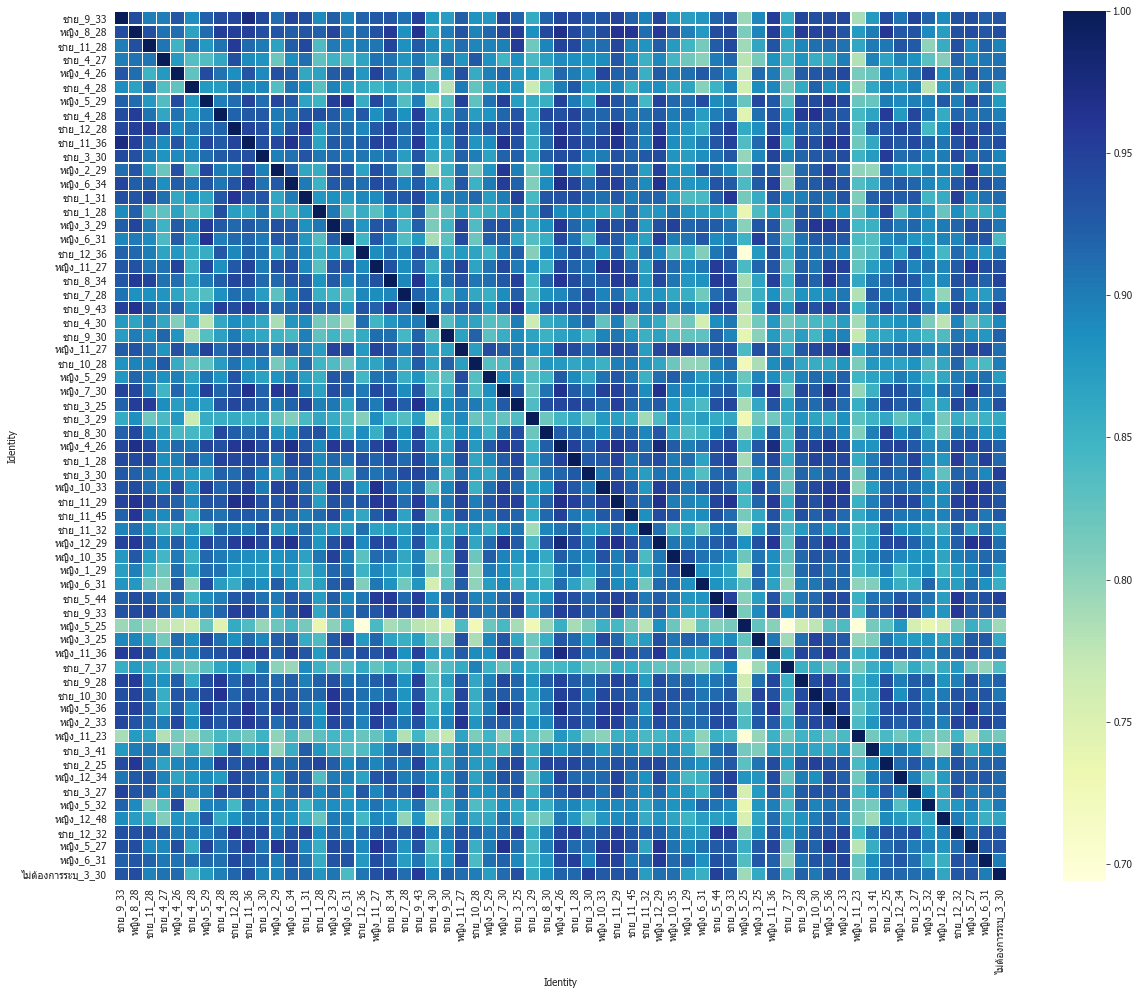

In [216]:
f, ax = plt.subplots(figsize =(20, 16))
sb.heatmap(user_user_matrix.iloc[:,:], ax = ax, cmap ="YlGnBu", linewidths = 0.1) 
plt.savefig('./Hw1/similarity.png',dpi = 150 , format = 'png')

#### จาก result พบว่า คนที่มีเพศเดียวกันเเละอายุใกล้เคียงกันจะมีความเหมือนกัน ที่มีค่า euclidean distanceที่ต่ำๆ


## Pearson Correlation 
### Overall  Interesting 

Correlation ของสิ่งที่มีความสัมพันธ์กันสูงจะสังเกตุได้ว่าทั้งความสนใจเเละการบริโภคจะเป็นไปทางเดียวกันกับกลุ่มๆๆเดียวกัน เช่น ในกลุ่ม สนใจ/บริโภคบุฟเฟ่ต์ ปิ้งย่าง อาหารญี่ปุ่นก็จะมีความสัมพันธ์กันสูง 


In [88]:
### interesting 
temp_survey.columns

Index(['Timestamp', 'สนใจ[อาหารญี่ปุ่น]', 'สนใจ[อาหารจึน]', 'สนใจ[อาหารไทย]',
       'สนใจ[อาหารอีสาน]', 'สนใจ[อาหารสุขภาพ]', 'สนใจ[บุฟเฟต์]',
       'สนใจ[ชาบูชาบู]', 'สนใจ[ปิ้งย่าง]', 'สนใจ[เหล้าเบียร์]',
       'สนใจ[เสื้อผ้าแฟชั่น]', 'สนใจ[แต่งหน้า]', 'สนใจ[skincare บำรุงผิว]',
       'สนใจ[การออกกำลังกาย]', 'สนใจ[การเล่นเกมส์]', 'สนใจ[การท่องเที่ยว]',
       'สนใจ[การอ่านหนังสือ]', 'สนใจ[การอ่านบทความ Online]',
       'สนใจ[การเรียน e-learning]', 'สนใจ[ดู Series]', 'สนใจ[ดูหนัง]',
       'สนใจ[ดู Youtube]', 'สนใจ[ดู Netflix]', 'สนใจ[Content ด้านบันเทิง]',
       'สนใจ[Content เกี่่ยวกับเกมส์]',
       'สนใจ[Content เกี่ยวกับการ review ร้านอาหาร]',
       'สนใจ[Content เกี่ยวกับการท่องเที่ยว]',
       'สนใจ[Content เกี่ยวกับการแต่งบ้าน]',
       'สนใจ[Content เกี่ยวกับการโทรทัศน์]', 'สนใจ[Content เกี่ยวกับละคร]',
       'สนใจ[Content เกี่ยวกับการเมือง]', 'บริโภค[อาหารญี่ปุ่น]',
       'บริโภค[อาหารจึน]', 'บริโภค[อาหารไทย]', 'บริโภค[อาหารอีสาน]',
       'บริโภค[อาหารสุขภาพ]', 'บริโภ

In [39]:
interested_cols = [col for col in temp_survey.columns if ('สนใจ' in col) or col == 'Age' or col == 'เพศ' ]
consume_cols = [col for col in temp_survey.columns if ('บริโภค' in col) or col == 'Age' or col == 'เพศ'  ]
#print(list(df.columns))
temp_survey_inter = temp_survey[interested_cols]
temp_survey_consume = temp_survey[consume_cols]


In [40]:
correlation_pear_inter = temp_survey_inter.corr(method='pearson')

In [41]:
correlation_pear_inter

,สนใจ[อาหารญี่ปุ่น],สนใจ[อาหารจึน],สนใจ[อาหารไทย],สนใจ[อาหารอีสาน],สนใจ[อาหารสุขภาพ],สนใจ[บุฟเฟต์],สนใจ[ชาบูชาบู],สนใจ[ปิ้งย่าง],สนใจ[เหล้าเบียร์],สนใจ[เสื้อผ้าแฟชั่น],...,สนใจ[ดู Netflix],สนใจ[Content ด้านบันเทิง],สนใจ[Content เกี่่ยวกับเกมส์],สนใจ[Content เกี่ยวกับการ review ร้านอาหาร],สนใจ[Content เกี่ยวกับการท่องเที่ยว],สนใจ[Content เกี่ยวกับการแต่งบ้าน],สนใจ[Content เกี่ยวกับการโทรทัศน์],สนใจ[Content เกี่ยวกับละคร],สนใจ[Content เกี่ยวกับการเมือง],Age
สนใจ[อาหารญี่ปุ่น],1.000000,0.183296,0.145602,0.147661,-0.065076,0.419898,0.565748,0.291514,-0.122948,0.132005,...,0.162962,0.189610,0.211447,0.492472,0.326259,0.047509,-0.020065,0.113752,-0.002893,-0.159958
สนใจ[อาหารจึน],0.183296,1.000000,-0.019348,-0.001542,0.184708,-0.046306,0.053874,0.164691,0.074457,-0.080016,...,0.071265,0.142805,-0.164434,-0.008829,0.142515,0.055277,0.146242,0.256343,-0.061932,0.230792
สนใจ[อาหารไทย],0.145602,-0.019348,1.000000,0.587620,0.139504,0.028239,0.122320,0.012510,0.223797,0.305590,...,0.301399,0.358933,0.080494,0.258793,0.307045,0.228765,0.258939,0.368052,0.294486,0.136509
สนใจ[อาหารอีสาน],0.147661,-0.001542,0.587620,1.000000,0.272640,-0.021135,0.002153,-0.214018,0.098865,0.388254,...,0.251159,0.213325,-0.138965,0.104730,0.246205,0.233475,0.059229,0.183730,0.245932,0.031228
สนใจ[อาหารสุขภาพ],-0.065076,0.184708,0.139504,0.272640,1.000000,-0.114337,-0.071215,-0.234293,-0.078235,0.191345,...,0.019482,-0.031257,-0.138591,0.009823,0.206435,0.132436,0.177285,0.105656,0.210777,0.266435
สนใจ[บุฟเฟต์],0.419898,-0.046306,0.028239,-0.021135,-0.114337,1.000000,0.708651,0.569601,0.243643,0.132237,...,0.104080,0.321266,0.193600,0.354044,0.266865,0.100076,0.164792,0.185538,0.188379,-0.283205
สนใจ[ชาบูชาบู],0.565748,0.053874,0.122320,0.002153,-0.071215,0.708651,1.000000,0.630016,0.187260,0.241247,...,0.174847,0.205141,0.197524,0.426675,0.345573,0.199605,0.034024,0.092039,0.155494,-0.318132
สนใจ[ปิ้งย่าง],0.291514,0.164691,0.012510,-0.214018,-0.234293,0.569601,0.630016,1.000000,0.242458,0.068091,...,0.170605,0.168319,0.091025,0.354671,0.231057,0.080253,0.028737,0.096859,0.111493,-0.148193
สนใจ[เหล้าเบียร์],-0.122948,0.074457,0.223797,0.098865,-0.078235,0.243643,0.187260,0.242458,1.000000,0.075931,...,0.126739,0.145015,0.059260,-0.097832,0.104087,0.234963,0.210542,0.197982,0.342130,-0.092993
สนใจ[เสื้อผ้าแฟชั่น],0.132005,-0.080016,0.305590,0.388254,0.191345,0.132237,0.241247,0.068091,0.075931,1.000000,...,-0.012999,0.288556,-0.190744,0.148151,0.158905,0.267420,0.129844,0.330839,0.046183,-0.132823


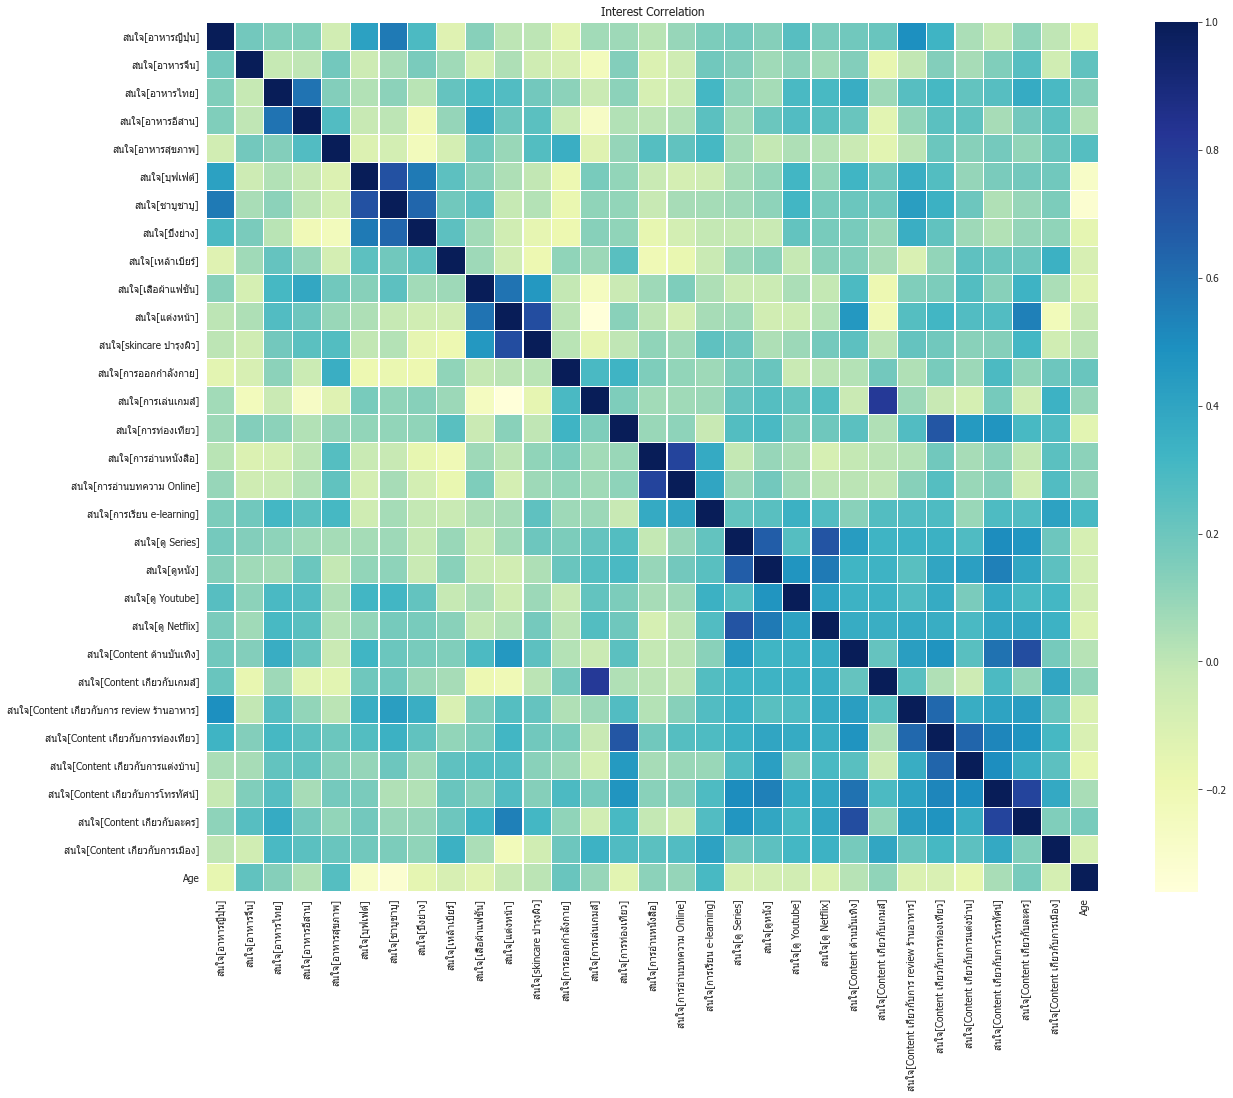

In [44]:
f, ax = plt.subplots(figsize =(20, 16)) 
sb.heatmap(correlation_pear_inter, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 
plt.title("Interest Correlation")
plt.savefig('./Hw1/corr_interest_all.png',dpi = 150 , format = 'png' )

##  Correlation of  interest  split by Male/Female

### Male Interest


In [45]:
 # spectify  by man
cor_man = temp_survey_inter[temp_survey_inter['เพศ']=='ชาย'].corr(method='pearson')
cor_man

,สนใจ[อาหารญี่ปุ่น],สนใจ[อาหารจึน],สนใจ[อาหารไทย],สนใจ[อาหารอีสาน],สนใจ[อาหารสุขภาพ],สนใจ[บุฟเฟต์],สนใจ[ชาบูชาบู],สนใจ[ปิ้งย่าง],สนใจ[เหล้าเบียร์],สนใจ[เสื้อผ้าแฟชั่น],...,สนใจ[ดู Netflix],สนใจ[Content ด้านบันเทิง],สนใจ[Content เกี่่ยวกับเกมส์],สนใจ[Content เกี่ยวกับการ review ร้านอาหาร],สนใจ[Content เกี่ยวกับการท่องเที่ยว],สนใจ[Content เกี่ยวกับการแต่งบ้าน],สนใจ[Content เกี่ยวกับการโทรทัศน์],สนใจ[Content เกี่ยวกับละคร],สนใจ[Content เกี่ยวกับการเมือง],Age
สนใจ[อาหารญี่ปุ่น],1.000000,0.380732,0.157459,0.189627,0.158708,0.494592,0.622619,0.280125,-0.109057,0.371818,...,0.128664,0.343853,0.224738,0.449090,0.369451,0.253527,0.090865,0.235961,0.032278,-0.158955
สนใจ[อาหารจึน],0.380732,1.000000,-0.067920,-0.120067,0.042025,0.114980,0.192861,0.417618,0.023500,0.091441,...,0.138233,0.200341,0.020525,0.056339,0.129532,0.060911,0.092110,0.379027,-0.071465,0.174396
สนใจ[อาหารไทย],0.157459,-0.067920,1.000000,0.273287,0.035847,0.327804,0.291628,0.086203,0.397987,0.192306,...,0.107498,0.367046,-0.016929,0.322179,0.345856,0.166665,0.323441,0.456864,0.322499,0.028509
สนใจ[อาหารอีสาน],0.189627,-0.120067,0.273287,1.000000,0.200475,0.285578,0.301159,-0.100646,0.178759,0.597866,...,0.118242,0.119993,-0.182551,0.104050,0.208373,0.277051,0.004377,0.100591,0.417877,-0.282223
สนใจ[อาหารสุขภาพ],0.158708,0.042025,0.035847,0.200475,1.000000,0.017470,0.183404,-0.152283,-0.247893,0.331520,...,-0.111614,-0.083360,-0.146287,0.154079,0.299996,-0.058172,0.045716,0.055251,0.133350,0.189060
สนใจ[บุฟเฟต์],0.494592,0.114980,0.327804,0.285578,0.017470,1.000000,0.711382,0.463457,0.504125,0.329081,...,0.108051,0.440531,0.207974,0.341481,0.327534,0.184177,0.263402,0.303393,0.353010,-0.491919
สนใจ[ชาบูชาบู],0.622619,0.192861,0.291628,0.301159,0.183404,0.711382,1.000000,0.511995,0.277423,0.470055,...,0.213257,0.283954,-0.027378,0.343887,0.357517,0.240598,0.010812,0.122111,0.196609,-0.497942
สนใจ[ปิ้งย่าง],0.280125,0.417618,0.086203,-0.100646,-0.152283,0.463457,0.511995,1.000000,0.244749,0.145000,...,0.234779,0.267126,-0.114059,0.331462,0.223815,0.108983,0.021236,0.220676,-0.075145,-0.118948
สนใจ[เหล้าเบียร์],-0.109057,0.023500,0.397987,0.178759,-0.247893,0.504125,0.277423,0.244749,1.000000,0.177316,...,-0.016452,0.222404,-0.142556,-0.050040,0.114012,0.241095,0.209284,0.363282,0.150324,-0.278444
สนใจ[เสื้อผ้าแฟชั่น],0.371818,0.091441,0.192306,0.597866,0.331520,0.329081,0.470055,0.145000,0.177316,1.000000,...,0.008194,0.130834,-0.262977,0.153021,0.215830,0.228681,0.020931,0.166502,0.116169,-0.146689


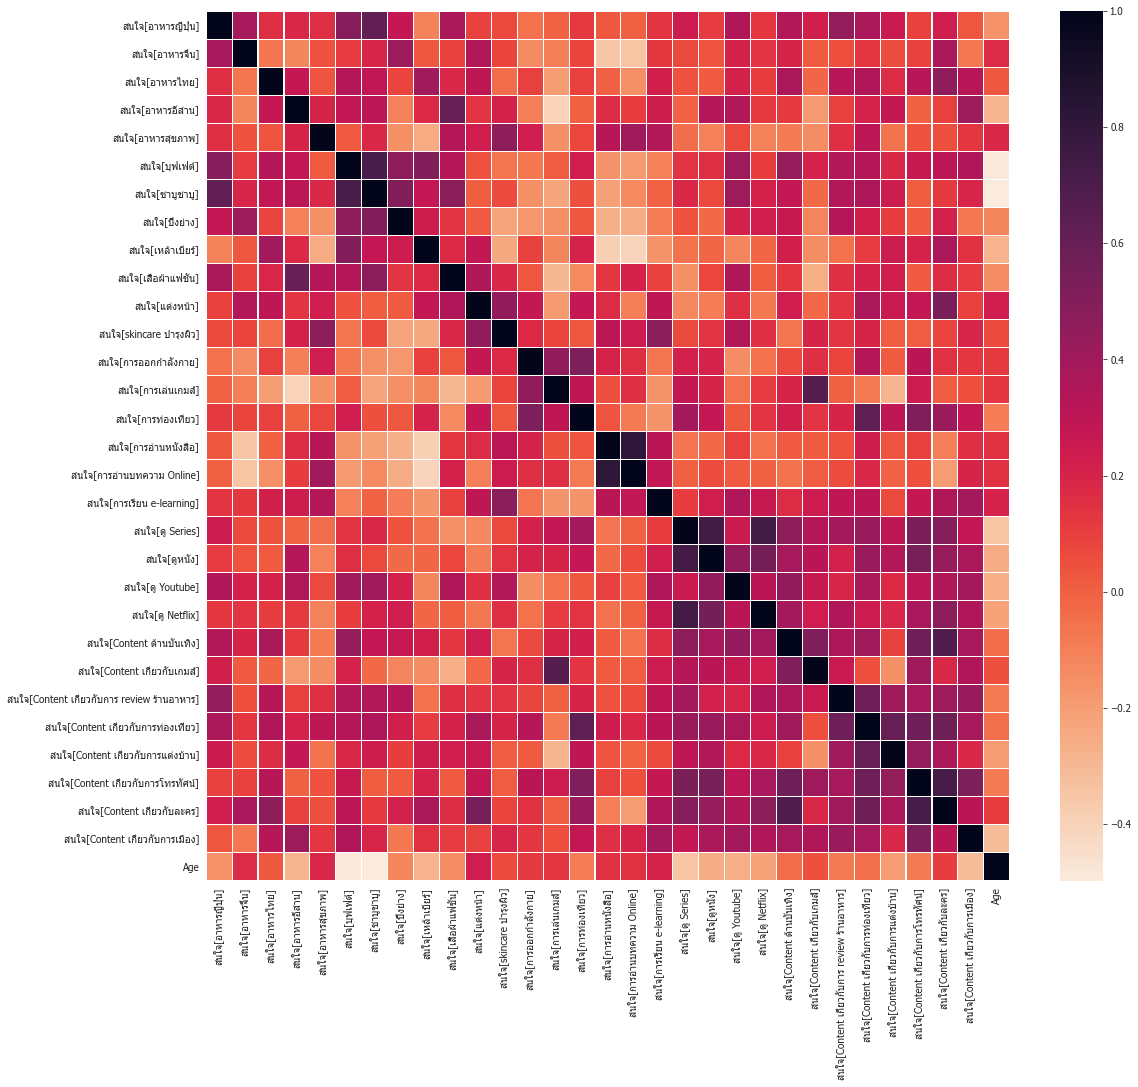

In [46]:
## Drawn graph 
f, ax = plt.subplots(figsize =(18, 16)) 
sb.heatmap(cor_man, ax = ax, cmap ="rocket_r", linewidths = 0.1)
plt.savefig('./Hw1/Corr_Interest_male.png',dpi = 150 , format = 'png' )

### conclusion 
พบว่า ความสัมพันธ์โดยส่วนใหญ่เป็นไปตามเทรนของภาพรวม เช่น ความสนใจกลุ่มอาหารญี่ปุ่น ความสนใจอาหารปิ้งย่าง จะมีความสัมพันธ์กันในทางบวก เเต่มี บางที่ค่อนข้างมีความสัมพันธ์เชิงลบเช้นสนใจอาหารอีสายกับการสนใจเกมส์
เป็นต้น

## Female

In [48]:
cor_woman = temp_survey_inter[temp_survey_inter['เพศ']=='หญิง'].corr(method='pearson')
cor_woman

,สนใจ[อาหารญี่ปุ่น],สนใจ[อาหารจึน],สนใจ[อาหารไทย],สนใจ[อาหารอีสาน],สนใจ[อาหารสุขภาพ],สนใจ[บุฟเฟต์],สนใจ[ชาบูชาบู],สนใจ[ปิ้งย่าง],สนใจ[เหล้าเบียร์],สนใจ[เสื้อผ้าแฟชั่น],...,สนใจ[ดู Netflix],สนใจ[Content ด้านบันเทิง],สนใจ[Content เกี่่ยวกับเกมส์],สนใจ[Content เกี่ยวกับการ review ร้านอาหาร],สนใจ[Content เกี่ยวกับการท่องเที่ยว],สนใจ[Content เกี่ยวกับการแต่งบ้าน],สนใจ[Content เกี่ยวกับการโทรทัศน์],สนใจ[Content เกี่ยวกับละคร],สนใจ[Content เกี่ยวกับการเมือง],Age
สนใจ[อาหารญี่ปุ่น],1.000000,-0.060017,0.099929,0.081772,-0.289382,0.321728,0.467467,0.243181,-0.240700,-0.121125,...,0.176864,-0.012854,0.174405,0.609870,0.274366,-0.187331,-0.172840,-0.038148,-0.191057,-0.193125
สนใจ[อาหารจึน],-0.060017,1.000000,-0.013822,0.095626,0.372251,-0.231462,-0.136992,-0.193448,0.206600,-0.389916,...,-0.024133,-0.025642,-0.350402,-0.172312,0.114543,0.010685,0.186439,0.013967,-0.032210,0.325240
สนใจ[อาหารไทย],0.099929,-0.013822,1.000000,0.785821,0.259918,-0.200399,-0.057875,-0.124935,0.089356,0.395738,...,0.470759,0.419007,0.162049,0.207970,0.261465,0.272516,0.221048,0.356242,0.307096,0.232693
สนใจ[อาหารอีสาน],0.081772,0.095626,0.785821,1.000000,0.375447,-0.317031,-0.348730,-0.417267,0.017172,0.166821,...,0.401909,0.318368,-0.086239,0.062557,0.248723,0.166487,0.087889,0.264693,0.165613,0.388388
สนใจ[อาหารสุขภาพ],-0.289382,0.372251,0.259918,0.375447,1.000000,-0.221040,-0.326814,-0.319066,0.217254,0.076400,...,0.215800,0.065228,-0.127890,-0.194816,0.132031,0.367839,0.387754,0.228977,0.442079,0.383456
สนใจ[บุฟเฟต์],0.321728,-0.231462,-0.200399,-0.317031,-0.221040,1.000000,0.696589,0.702514,-0.116624,-0.061418,...,0.075668,0.222393,0.179918,0.398196,0.192708,0.013782,0.056959,0.061880,0.003151,-0.082453
สนใจ[ชาบูชาบู],0.467467,-0.136992,-0.057875,-0.348730,-0.326814,0.696589,1.000000,0.769199,-0.006242,0.003567,...,0.085639,0.111663,0.428410,0.591208,0.320540,0.161922,0.070284,0.062004,-0.001720,-0.134015
สนใจ[ปิ้งย่าง],0.243181,-0.193448,-0.124935,-0.417267,-0.319066,0.702514,0.769199,1.000000,0.104427,0.069964,...,0.011625,0.140550,0.217009,0.503731,0.279750,0.098131,0.122868,0.024669,0.063504,-0.273841
สนใจ[เหล้าเบียร์],-0.240700,0.206600,0.089356,0.017172,0.217254,-0.116624,-0.006242,0.104427,1.000000,0.175467,...,0.344928,0.315813,0.125030,-0.078603,0.202156,0.384894,0.424744,0.224568,0.411614,0.138732
สนใจ[เสื้อผ้าแฟชั่น],-0.121125,-0.389916,0.395738,0.166821,0.076400,-0.061418,0.003567,0.069964,0.175467,1.000000,...,-0.022964,0.251427,0.119081,-0.051828,-0.071811,0.197581,0.085762,0.303769,0.341066,-0.057516


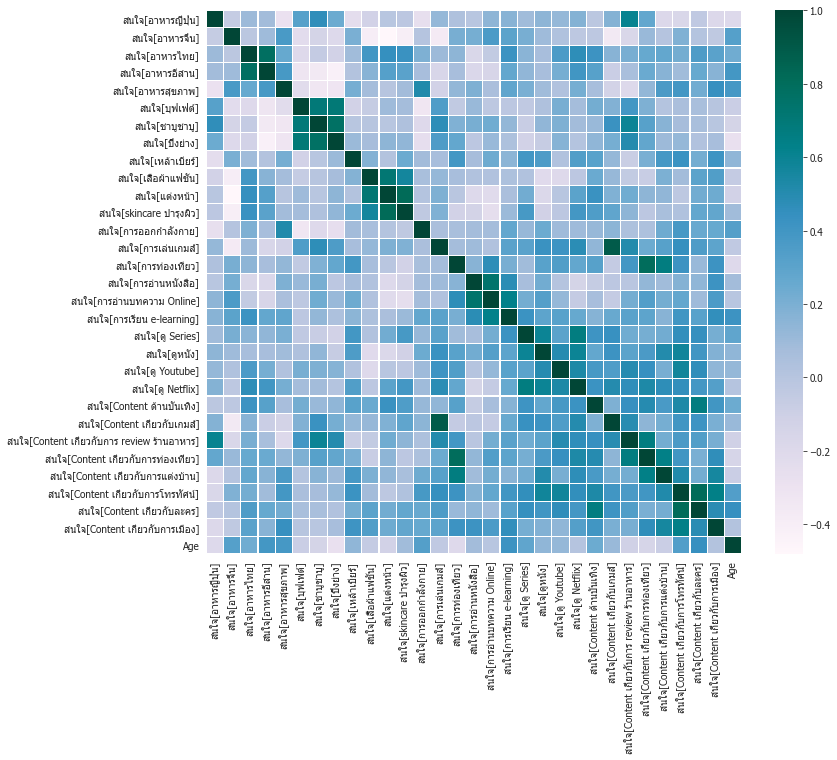

In [49]:
## Drawn graph 
f, ax = plt.subplots(figsize =(12, 10)) 
sb.heatmap(cor_woman, ax = ax, cmap ="PuBuGn", linewidths = 0.1) 
plt.savefig('./Hw1/Corr_interest_female.png',dpi = 150 , format = 'png' )

### conclusion 
พบว่า ความสัมพันธ์โดยส่วนใหญ่เป็นไปตามเทรนของภาพรวม เช่น ความสนใจกลุ่มอาหารญี่ปุ่น ความสนใจอาหารปิ้งย่าง หรือ สนในดู Netflix กับ สนใจดูหนัง จะมีความสัมพันธ์กันในทางบวก เเต่มี บางที่ค่อนข้างมีความสัมพันธ์เชิงลบเช่นสนใจการแต่งหน้าแต่ก็ไม่สนใจอาหารจีน

## Correlation  with  consume of overall

In [50]:
cor_consume = temp_survey_consume.corr(method='pearson')
cor_consume

,บริโภค[อาหารญี่ปุ่น],บริโภค[อาหารจึน],บริโภค[อาหารไทย],บริโภค[อาหารอีสาน],บริโภค[อาหารสุขภาพ],บริโภค[บุฟเฟต์],บริโภค[ชาบูชาบู],บริโภค[ปิ้งย่าง],บริโภค[เหล้าเบียร์],บริโภค[เสื้อผ้าแฟชั่น],...,บริโภค[ดู Netflix],บริโภค[Content ด้านบันเทิง],บริโภค[Content เกี่่ยวกับเกมส์],บริโภค[Content เกี่ยวกับการ review ร้านอาหาร],บริโภค[Content เกี่ยวกับการท่องเที่ยว],บริโภค[Content เกี่ยวกับการแต่งบ้าน],บริโภค[Content เกี่ยวกับการโทรทัศน์],บริโภค[Content เกี่ยวกับละคร],บริโภค[Content เกี่ยวกับการเมือง],Age
บริโภค[อาหารญี่ปุ่น],1.000000,0.201019,-0.008656,0.255596,0.211347,0.452719,0.553200,0.363131,-0.012661,0.202090,...,0.258592,0.061995,0.160320,0.339288,0.248484,0.084140,0.136615,0.011370,0.102948,-0.073189
บริโภค[อาหารจึน],0.201019,1.000000,-0.212573,-0.071733,0.090394,-0.025623,0.295660,0.190619,-0.000307,-0.014136,...,0.101328,0.079898,-0.028166,0.011285,-0.034153,-0.096467,-0.034750,-0.070747,-0.093133,0.186531
บริโภค[อาหารไทย],-0.008656,-0.212573,1.000000,0.115638,0.104190,-0.006981,0.003685,-0.101217,0.142392,0.047480,...,0.032100,0.025961,0.014210,0.124639,-0.039817,0.113282,0.018119,-0.019274,0.119378,0.154396
บริโภค[อาหารอีสาน],0.255596,-0.071733,0.115638,1.000000,0.301185,0.117072,0.088747,0.213695,0.058324,0.256849,...,0.107015,-0.113162,-0.262201,0.073360,0.216912,0.143191,0.082662,0.054111,0.230956,-0.058663
บริโภค[อาหารสุขภาพ],0.211347,0.090394,0.104190,0.301185,1.000000,-0.004224,0.051553,0.064078,0.086168,0.196783,...,0.163558,-0.143664,-0.188840,0.119070,0.266012,0.263639,0.089254,-0.014929,-0.001469,0.132620
บริโภค[บุฟเฟต์],0.452719,-0.025623,-0.006981,0.117072,-0.004224,1.000000,0.684628,0.459750,0.088721,0.069644,...,-0.007337,0.077842,0.242414,0.327226,0.128419,0.082857,-0.033132,-0.030946,0.149979,-0.262057
บริโภค[ชาบูชาบู],0.553200,0.295660,0.003685,0.088747,0.051553,0.684628,1.000000,0.483526,0.109832,0.112768,...,0.066688,0.228105,0.283014,0.355820,0.129060,0.041118,0.032418,0.079859,0.122894,-0.059817
บริโภค[ปิ้งย่าง],0.363131,0.190619,-0.101217,0.213695,0.064078,0.459750,0.483526,1.000000,0.176660,0.054584,...,0.008183,-0.061788,0.163816,0.286024,0.303351,0.139953,0.107932,-0.005753,0.289264,0.039498
บริโภค[เหล้าเบียร์],-0.012661,-0.000307,0.142392,0.058324,0.086168,0.088721,0.109832,0.176660,1.000000,0.197900,...,0.115841,-0.079722,-0.028231,-0.119613,0.100594,0.254167,-0.003757,-0.040226,0.317360,0.025495
บริโภค[เสื้อผ้าแฟชั่น],0.202090,-0.014136,0.047480,0.256849,0.196783,0.069644,0.112768,0.054584,0.197900,1.000000,...,0.209890,0.405331,-0.064658,0.358197,0.375486,0.402500,0.293749,0.401470,0.125618,-0.152547


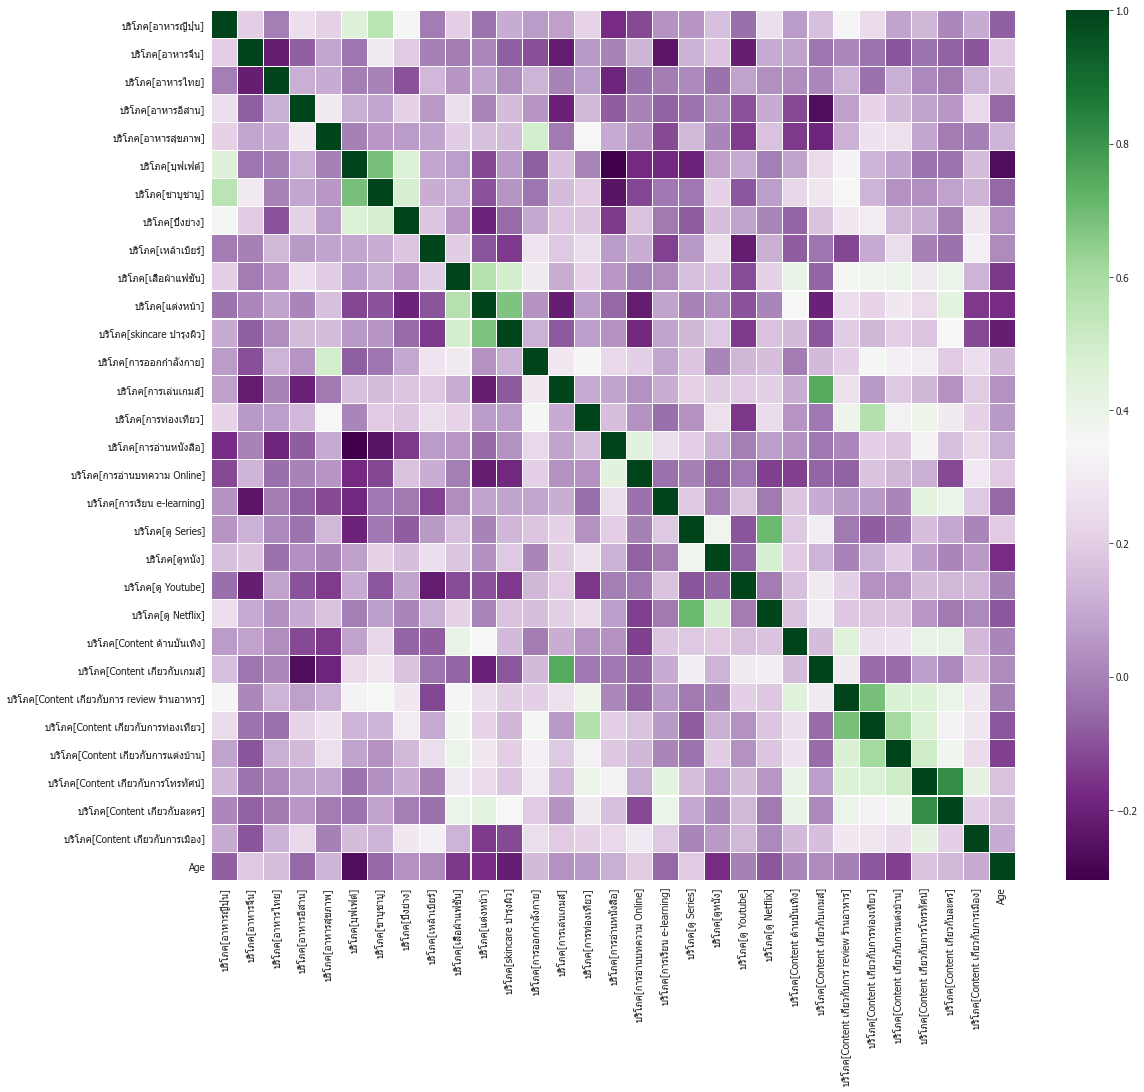

In [51]:
## Drawn graph 
f, ax = plt.subplots(figsize =(18, 16)) 
sb.heatmap(cor_consume, ax = ax, cmap ="PRGn", linewidths = 0.1)
plt.savefig('./Hw1/corr_consumption_all.png',dpi = 150 , format = 'png' )

## Correlation  with  consume of male/female
### Male

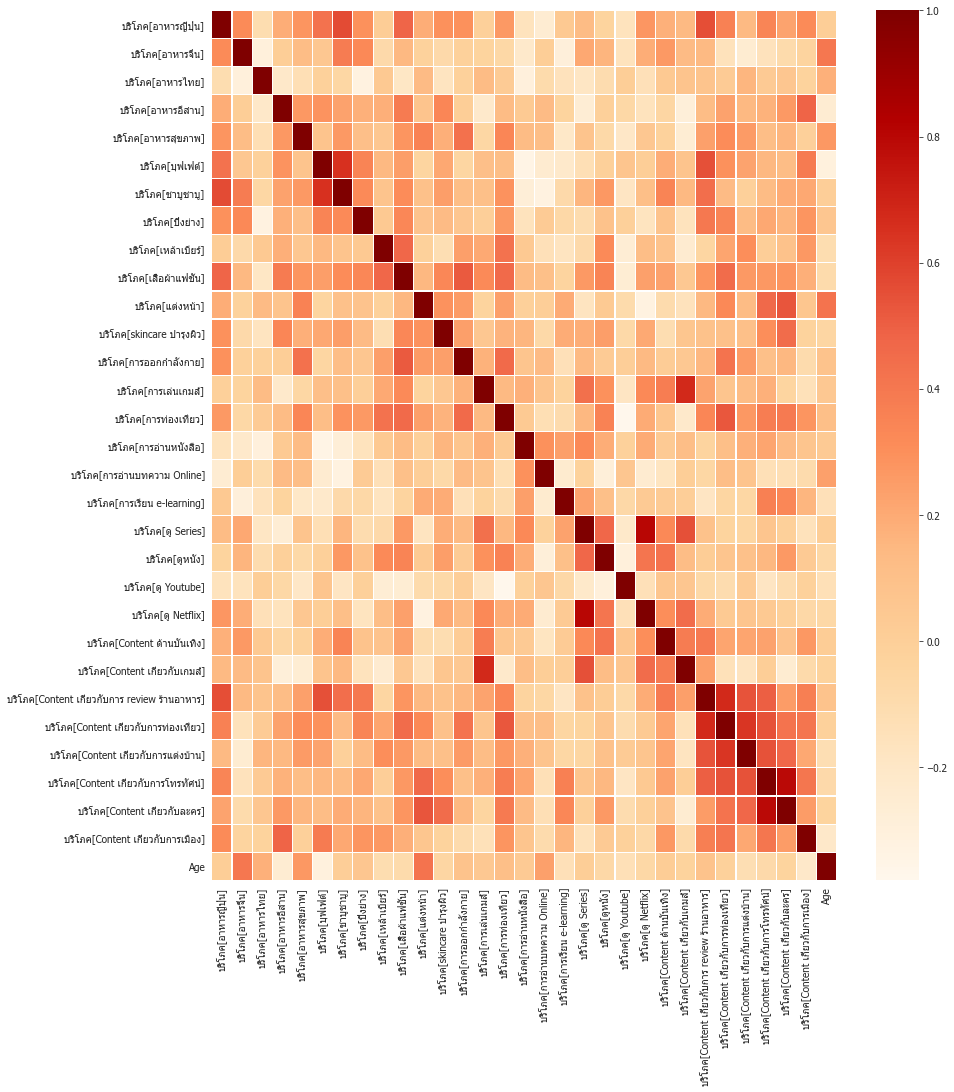

In [53]:
#temp_survey_consume
cor_man_consume = temp_survey_consume[temp_survey_consume['เพศ']=='ชาย'].corr(method='pearson')
f, ax = plt.subplots(figsize =(14, 16)) 
sb.heatmap(cor_man_consume, ax = ax, cmap ="OrRd", linewidths = 0.1)
plt.savefig('./Hw1/corr_consumption_male.png',dpi = 150 , format = 'png' )

#### conclusion 
พบว่า ความสัมพันธ์โดยส่วนใหญ่ของผู้ชายเป็นไปตามเทรนของภาพรวม เช่น การบริโภคกลุ่มชาบู การบริโภคอาหารปิ้งย่าง หรือ การบริโภคดู Netflix กับ การบริโภคหนัง หรือจะเป็นพวกในกลุ่ม บริโภค content เเต่งบ้าน กับ conten ทางโทรทัศน์จะมีความสัมพันธ์กันในทางบวก แต่จะมีบาง factor ที่มีความสัมพันธ์เชิงลบ เช่นการดู youtube กับ การท่องเที่ยว 

In [54]:
cor_woman_consume = temp_survey_consume[temp_survey_consume['เพศ']=='หญิง'].corr(method='pearson')
cor_woman_consume

,บริโภค[อาหารญี่ปุ่น],บริโภค[อาหารจึน],บริโภค[อาหารไทย],บริโภค[อาหารอีสาน],บริโภค[อาหารสุขภาพ],บริโภค[บุฟเฟต์],บริโภค[ชาบูชาบู],บริโภค[ปิ้งย่าง],บริโภค[เหล้าเบียร์],บริโภค[เสื้อผ้าแฟชั่น],...,บริโภค[ดู Netflix],บริโภค[Content ด้านบันเทิง],บริโภค[Content เกี่่ยวกับเกมส์],บริโภค[Content เกี่ยวกับการ review ร้านอาหาร],บริโภค[Content เกี่ยวกับการท่องเที่ยว],บริโภค[Content เกี่ยวกับการแต่งบ้าน],บริโภค[Content เกี่ยวกับการโทรทัศน์],บริโภค[Content เกี่ยวกับละคร],บริโภค[Content เกี่ยวกับการเมือง],Age
บริโภค[อาหารญี่ปุ่น],1.000000,0.044120,0.055298,0.342548,0.129312,0.488899,0.530674,0.457332,-0.089896,-0.067043,...,0.225795,-0.076853,0.170487,0.068821,0.144268,0.046891,-0.018789,-0.144089,-0.147036,-0.213251
บริโภค[อาหารจึน],0.044120,1.000000,-0.145191,-0.187549,-0.009555,-0.093744,0.206613,0.110581,0.230736,-0.329491,...,-0.039191,-0.341487,-0.144398,-0.252390,0.044827,0.009471,0.009487,-0.192957,-0.025274,-0.087191
บริโภค[อาหารไทย],0.055298,-0.145191,1.000000,0.307937,0.298203,-0.047585,0.030954,-0.018344,0.196274,0.333489,...,0.172814,0.119283,-0.090839,0.251694,-0.020016,0.146892,0.065995,0.029438,0.156803,0.130349
บริโภค[อาหารอีสาน],0.342548,-0.187549,0.307937,1.000000,0.313728,-0.071029,-0.067947,0.279290,-0.063690,0.205196,...,0.425925,-0.210719,-0.266511,0.030795,0.234300,0.144846,0.023962,-0.086550,0.122347,0.157423
บริโภค[อาหารสุขภาพ],0.129312,-0.009555,0.298203,0.313728,1.000000,-0.096500,-0.240936,0.066960,0.223893,0.156813,...,0.325496,-0.414443,-0.103622,-0.042361,0.221114,0.259975,0.046797,-0.229972,0.150411,-0.016897
บริโภค[บุฟเฟต์],0.488899,-0.093744,-0.047585,-0.071029,-0.096500,1.000000,0.731549,0.570713,-0.109829,0.002849,...,-0.049475,0.057561,0.382107,0.101589,-0.001179,-0.008967,-0.141727,-0.040931,-0.227332,-0.249318
บริโภค[ชาบูชาบู],0.530674,0.206613,0.030954,-0.067947,-0.240936,0.731549,1.000000,0.699913,0.108535,-0.032377,...,-0.023234,0.160692,0.423742,0.314866,0.218029,0.159546,-0.006187,0.089732,-0.041204,-0.187704
บริโภค[ปิ้งย่าง],0.457332,0.110581,-0.018344,0.279290,0.066960,0.570713,0.699913,1.000000,0.238567,-0.029653,...,0.252795,-0.063736,0.390412,0.322019,0.493301,0.296582,0.166213,0.076893,0.157743,-0.052452
บริโภค[เหล้าเบียร์],-0.089896,0.230736,0.196274,-0.063690,0.223893,-0.109829,0.108535,0.238567,1.000000,0.100013,...,0.111613,-0.148251,0.076383,-0.111795,0.108464,0.352165,0.115985,0.043505,0.231735,0.164546
บริโภค[เสื้อผ้าแฟชั่น],-0.067043,-0.329491,0.333489,0.205196,0.156813,0.002849,-0.032377,-0.029653,0.100013,1.000000,...,0.279359,0.440487,0.065827,0.313490,0.086851,0.459080,0.187416,0.310036,0.374455,-0.178148


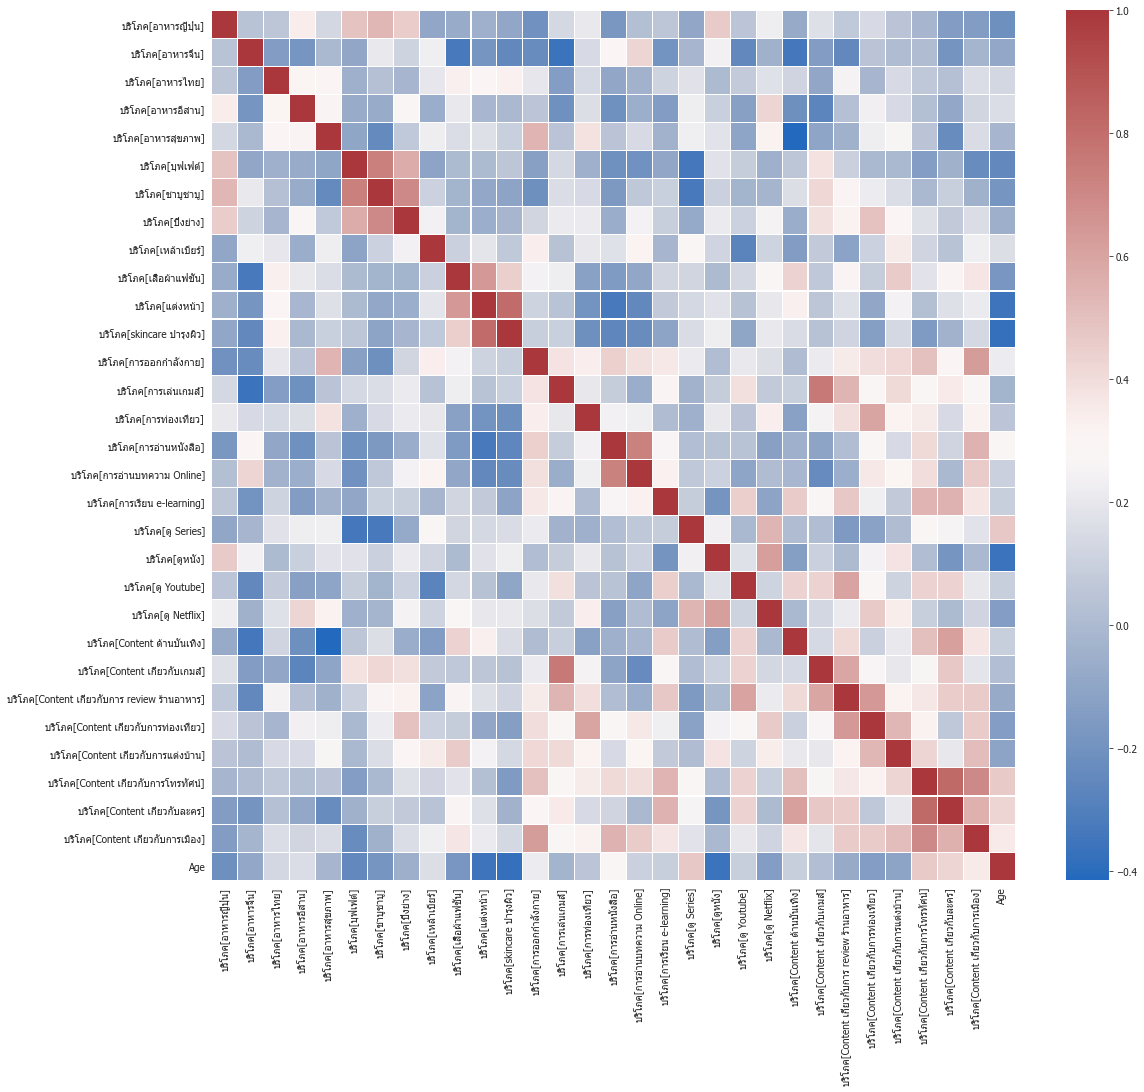

In [55]:
cor_woman_consume
f, ax = plt.subplots(figsize =(18, 16)) 
sb.heatmap(cor_woman_consume, ax = ax, cmap ="vlag", linewidths = 0.1) 
plt.savefig('./Hw1/corr_consumption_female.png',dpi = 150 , format = 'png' )

## conclusion
พบว่า ความสัมพันธ์การบริโภคโดยส่วนใหญ่ของผู้หญิงเป็นไปตามเทรนของภาพรวม เช่น การเเต่งหน้า การบริโภคครีมบำรุงผิว การเลือกแฟชั่น หรือ จะมีความสัมพันธ์กันในทางบวก เเต่จะมีบาง factor  ที่มีความสัมพันธ์กันในเชิงลบ เช่น อายุกับการบริโภค skin care or ผลิตภัณฑ์เเต่งหน้า